**Make sure your compute resource is set to GPU else you'll need to reset your session from scratch**

---
Group yourself to 3 max, and fill in below details
Group member detail(s): \
1. Muhammad Haazim bin Abdullah - 21b6016
2. Mohamad Ikhwan bin Haji Harun - 21b6019
3. Ahmad Rusyaid bin Jaini - 21b6011

Some of the concepts may be technically advanced, instead, it is to focus on learning how to effectively use Google Colab for scientific research. Don't fret if you dont understand any of codes written for you.

# Setting up Environment

Task 1: Set Up the Environment \
Import the necessary libraries for the exercise, PyTorch for neural network training.\
Load the CIFAR10 dataset.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader
from google.colab import files
from PIL import Image

In [ ]:
# Set the device to GPU if available, otherwise, use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Define the modified neural network architecture for CIFAR-10
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(8 * 8 * 32, 128)  # Adjusted for CIFAR-10 image size
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # Output size matches the number of CIFAR-10 classes (10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 8 * 8 * 32)  # Adjusted for CIFAR-10 image size
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x


Below are the Hyperparameters for the neural network (think of it as knobs that you can tune to enhance performance)


Task 4: Model debugging (Mess around with these 3 hyperparameters) \
hint: \
LEARNING_RATE: The current value is set to 1e10 (10000000000.0). Try adjusting it to find an optimal learning rate.\
BATCH_SIZE: Set it to a power of 2, such as 16, 32, or 64, to potentially improve training efficiency. \
EPOCH: Consider letting the model train for more epochs. The default value is set to 1; experiment with longer training durations for better convergence and performance evaluation.

In [ ]:
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCH = 20

In [ ]:
# Function to train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.to(device)
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_predictions = 0  # Initialize a counter for correct predictions
        total_samples = 0  # Initialize a counter for total samples

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

             # Measure accuracy
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        # Calculate accuracy for the current epoch
        accuracy = 100.0 * correct_predictions / total_samples
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy}")
    print("Training complete!")


In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms)

100%|██████████| 170498071/170498071 [00:03<00:00, 48328647.79it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
# Load and preprocess the CFAR10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
#TODO: Complete below line to import CIFAR10 dataset
train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)

Files already downloaded and verified


In [ ]:
train_set.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
# Create the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)

Task 2: Measure performance difference training between GPU and CPU


In [ ]:
# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs=EPOCH)

Epoch 1/20, Loss: 2.1137, Accuracy: 24.356
Epoch 2/20, Loss: 1.7542, Accuracy: 37.61
Epoch 3/20, Loss: 1.5585, Accuracy: 44.602
Epoch 4/20, Loss: 1.4127, Accuracy: 49.546
Epoch 5/20, Loss: 1.3258, Accuracy: 52.694
Epoch 6/20, Loss: 1.2547, Accuracy: 55.614
Epoch 7/20, Loss: 1.1926, Accuracy: 57.828
Epoch 8/20, Loss: 1.1408, Accuracy: 59.752
Epoch 9/20, Loss: 1.0941, Accuracy: 61.43
Epoch 10/20, Loss: 1.0525, Accuracy: 63.028
Epoch 11/20, Loss: 1.0156, Accuracy: 64.386
Epoch 12/20, Loss: 0.9760, Accuracy: 65.948
Epoch 13/20, Loss: 0.9441, Accuracy: 66.92
Epoch 14/20, Loss: 0.9100, Accuracy: 68.278
Epoch 15/20, Loss: 0.8784, Accuracy: 69.428
Epoch 16/20, Loss: 0.8472, Accuracy: 70.458
Epoch 17/20, Loss: 0.8180, Accuracy: 71.384
Epoch 18/20, Loss: 0.7883, Accuracy: 72.544
Epoch 19/20, Loss: 0.7610, Accuracy: 73.484
Epoch 20/20, Loss: 0.7330, Accuracy: 74.546
Training complete!


Report your findings on:
*   What were the key differences you observed in the training speed between the GPU and CPU?
*   Were there any challenges or limitations you encountered while using the GPU for training?
*   Did you notice any impact on the final model's performance (accuracy, loss) when trained on the GPU versus the CPU?

**Findings**

GPU training speed is faster than CPU training speed.

As far as I was aware of, there were no limitations.

Accuracy in GPU increased slowly, while in CPU it decreased slowly. Initially loss in CPU is higher than GPU, but during model training, loss in CPU decreased faster than loss in GPU.

-------------------------------------------------------------------------------

**GPU** time: 5m

Epoch 1/20, Loss: 2.3037, Accuracy: 9.396
Epoch 2/20, Loss: 2.3036, Accuracy: 9.438
Epoch 3/20, Loss: 2.3036, Accuracy: 9.476
Epoch 4/20, Loss: 2.3035, Accuracy: 9.518
Epoch 5/20, Loss: 2.3034, Accuracy: 9.554
Epoch 6/20, Loss: 2.3033, Accuracy: 9.574
Epoch 7/20, Loss: 2.3032, Accuracy: 9.632
Epoch 8/20, Loss: 2.3031, Accuracy: 9.664
Epoch 9/20, Loss: 2.3030, Accuracy: 9.714
Epoch 10/20, Loss: 2.3029, Accuracy: 9.764
Epoch 11/20, Loss: 2.3028, Accuracy: 9.818
Epoch 12/20, Loss: 2.3027, Accuracy: 9.876
Epoch 13/20, Loss: 2.3026, Accuracy: 9.918
Epoch 14/20, Loss: 2.3025, Accuracy: 9.976
Epoch 15/20, Loss: 2.3025, Accuracy: 10.046
Epoch 16/20, Loss: 2.3024, Accuracy: 10.096
Epoch 17/20, Loss: 2.3023, Accuracy: 10.186
Epoch 18/20, Loss: 2.3022, Accuracy: 10.272
Epoch 19/20, Loss: 2.3021, Accuracy: 10.34
Epoch 20/20, Loss: 2.3020, Accuracy: 10.402

**CPU** time: 14m

Epoch 1/20, Loss: 2.3043, Accuracy: 9.972
Epoch 2/20, Loss: 2.3042, Accuracy: 9.974
Epoch 3/20, Loss: 2.3041, Accuracy: 9.974
Epoch 4/20, Loss: 2.3040, Accuracy: 9.974
Epoch 5/20, Loss: 2.3039, Accuracy: 9.974
Epoch 6/20, Loss: 2.3038, Accuracy: 9.972
Epoch 7/20, Loss: 2.3036, Accuracy: 9.972
Epoch 8/20, Loss: 2.3035, Accuracy: 9.966
Epoch 9/20, Loss: 2.3034, Accuracy: 9.97
Epoch 10/20, Loss: 2.3034, Accuracy: 9.972
Epoch 11/20, Loss: 2.3032, Accuracy: 9.97
Epoch 12/20, Loss: 2.3031, Accuracy: 9.968
Epoch 13/20, Loss: 2.3030, Accuracy: 9.968
Epoch 14/20, Loss: 2.3029, Accuracy: 9.968
Epoch 15/20, Loss: 2.3028, Accuracy: 9.964
Epoch 16/20, Loss: 2.3027, Accuracy: 9.964
Epoch 17/20, Loss: 2.3026, Accuracy: 9.962
Epoch 18/20, Loss: 2.3025, Accuracy: 9.96
Epoch 19/20, Loss: 2.3024, Accuracy: 9.96
Epoch 20/20, Loss: 2.3023, Accuracy: 9.958





Task 3: Visualize Loss and Accuracy


Text(0, 0.5, 'Accuracy')

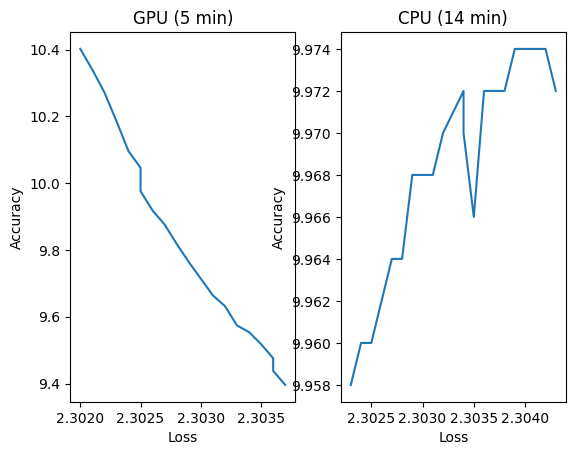

In [ ]:
#TODO:
#Your plots goes here
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

# GPU
x = np.array([2.3037,2.3036,2.3036,2.3035,2.3034,2.3033,2.3032,2.3031,2.3030,2.3029,2.3028,2.3027,2.3026,2.3025,2.3025,2.3024,2.3023,2.3022,2.3021,2.3020])
y = np.array([9.396,9.438,9.476,9.518,9.554,9.574,9.632,9.664,9.714,9.764,9.818,9.876,9.918,9.976,10.046,10.096,10.186,10.272,10.34,10.402])
gpu = plt.subplot(1,2,1)
gpu.set_title("GPU (5 min)")
plt.plot(x,y)
plt.xlabel("Loss")
plt.ylabel("Accuracy")

# CPU
x = np.array([2.3043,2.3042,2.3041,2.3040,2.3039,2.3038,2.3036,2.3035,2.3034,2.3034,2.3032,2.3031,2.3030,2.3029,2.3028,2.3027,2.3026,2.3025,2.3024,2.3023,])
y = np.array([9.972,9.974,9.974,9.974,9.974,9.972,9.972,9.966,9.97,9.972,9.97,9.968,9.968,9.968,9.964,9.964,9.962,9.96,9.96,9.958])
cpu = plt.subplot(1,2,2)
cpu.set_title("CPU (14 min)")
plt.plot(x,y)
plt.xlabel("Loss")
plt.ylabel("Accuracy")

Task 4: Test your own Image \
You can use the same code from the tutorial and ensure your model is properly trained!



In [ ]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize the image to match the model input size
    transforms.ToTensor(),  # Convert the image to a tensor
   transforms.Normalize((0.5,), (0.5,)),  # Normalize the image
])

# Function to preprocess and make predictions on the uploaded image
def predict_uploaded_image(upload):
    # Open the uploaded image
    image = Image.open(upload).convert('RGB')
    model.to("cpu")  # Set the model to evaluation mode

    # Preprocess the image
    input_tensor = transform(image)
    input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

    # Make predictions using the model
    with torch.no_grad():
        output = model(input_batch)
    _, predicted_idx = torch.max(output, 1)

    print(f"Predicted labels: {predicted_idx}")

In [ ]:
# Upload an image for prediction
uploaded = files.upload()

# If an image is uploaded, call the prediction function
if len(uploaded) > 0:
    for file_name in uploaded.keys():
        predict_uploaded_image(file_name)
else:
    print("No image uploaded.")

Saving Cat_August_2010-4.jpg to Cat_August_2010-4.jpg
Predicted labels: tensor([1])
